# ENGR 489/589 - term 2 - 2020
### School of Engineering - Okanagan Campus
### By Milad Ramezankhani, Dr. Abbas Milani
#### milad.ramezankhani@ubc.ca
## Lab 2 - Dataframes, Plots & ANOVA

### Content:

* Dataframes (Pandas)
* Plots
* ANOVA
    * one-way
    * two-way


# 1) Dataframes

In [4]:
import pandas as pd

### Import data from csv files

In [6]:
path = '/Users/hiba/Desktop/Master Courses Term 2 2020/ENGR 589/Lab/Lab 2/' ## file directory
filename = 'Assignment1_Q3.csv' # file name

data = pd.read_csv(path+filename) # save csv in "data" dataframe

In [7]:
# to print the whole table
data

,type 1,type 2
0,65,64
1,81,71
2,57,83
3,66,59
4,82,65
5,82,56
6,67,69
7,59,74
8,75,82
9,70,79


In [5]:
# to observe the "head" of the table
data.head() # you can give the number of desired rows as well, try -> data.head(3)

,type 1,type 2
0,65,64
1,81,71
2,57,83
3,66,59
4,82,65


In [6]:
# to observe the "tail" of the table
data.tail()

,type 1,type 2
5,82,56
6,67,69
7,59,74
8,75,82
9,70,79


In [7]:
# to get the statistical info about the dataframe
data.describe()

,type 1,type 2
count,10.000000,10.000000
mean,70.400000,70.200000
std,9.264028,9.366607
min,57.000000,56.000000
25%,65.250000,64.250000
50%,68.500000,70.000000
75%,79.500000,77.750000
max,82.000000,83.000000


In [11]:
# sum of column values
data.sum(axis=0) # try axis=1 -> sum per row

0    129
1    152
2    140
3    125
4    147
5    138
6    136
7    133
8    157
9    149
dtype: int64

In [12]:
# mean of column values
data.mean()

type 1    70.4
type 2    70.2
dtype: float64

In [13]:
# get kurtosis of column values
data.kurtosis() # data.skew() for skewness

type 1   -1.382728
type 2   -1.190668
dtype: float64

In [17]:
# get standard deviation
data.std(ddof=1) # try data.var(ddof=1) for variance; dof = n - ddof

type 1    9.264028
type 2    9.366607
dtype: float64

## 2)Plots

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

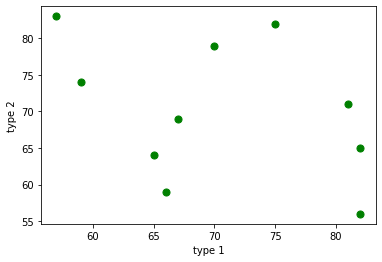

In [52]:
# scatter plot
data.plot.scatter(x='type 1', y = 'type 2', color = 'green', s=50) # s: size

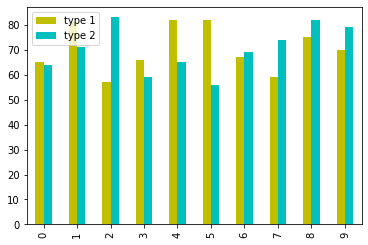

In [50]:
# bar plot
data.plot(kind='bar', color = 'yc')

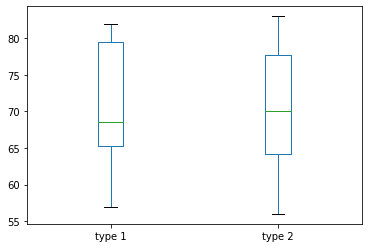

In [23]:
# box plot
data.plot.box()

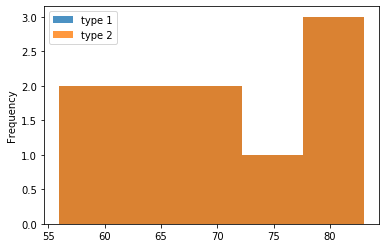

In [34]:
# histogram
data.plot.hist(alpha=0.8, bins=5)

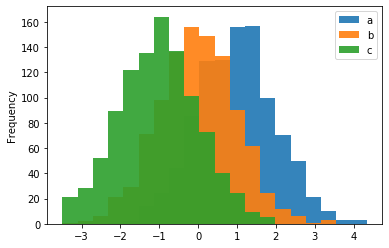

In [53]:
# a NICE histogram plot :)
import numpy as np
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df.plot.hist(bins=20, alpha = 0.9)

## Example 2 sample Z-test

In [80]:
# create Z-test function:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [81]:
# find the function requirements:

# sample means: X1, X2
X1=data['type 1'].mean()
X2=data['type 2'].mean()

# sample STDs: sd1, sd2 ### For Z-test, these should already be known. we calculate these for practicing
sd1 = data['type 1'].std(ddof=1) 
sd2 = data['type 2'].std(ddof=1)

# sample counts
n1 = data['type 1'].count()
n2 = data['type 2'].count()

In [82]:
twoSampZ(X1,X2,0,sd1,sd2,n1,n2)

(0.048, 0.9617)

## 3) ANOVA

### 3-1) one-way ANOVA

In [8]:
# Import required libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [16]:
# import data
df_anova = pd.read_csv(path+'PlantGrowth.csv')
df_anova.columns =  names=['row', 'weight','group']
df_anova

,row,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [10]:
# Approach 1:
stats.f_oneway(df_anova['weight'][df_anova['group']=='ctrl'],
              df_anova['weight'][df_anova['group']=='trt1'],
              df_anova['weight'][df_anova['group']=='trt2'])

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

In [17]:
df_anova['weight'][df_anova['group']=='ctrl']

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [11]:
# Approach 2:
results= ols('weight ~ C(group)',data=df_anova).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Fri, 07 Feb 2020   Prob (F-statistic):             0.0159
Time:                        11:41:58   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.0320      0.197     25.527      0.000       4.628       5.436
C(group)[T.trt1]    -0.3710      0.279     -1.331      0.194      -0.943       0.201
C(group)[T.trt2]     0.4940      0.279      1.772      0.088      -0.078       1.066
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.406
Skew:                           0.524   Prob(JB):                        0.495
Kurtosis:                       2.835   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# summary of the table, using "results" found in the previous cell
table = sm.stats.anova_lm(results, typ=2) # Type 2 Anova DataFrame
print(table)

            sum_sq    df         F   PR(>F)
C(group)   3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [13]:
# Approach 3: Manual Calculation:
# https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

### 3-2) two-way ANOVA

In [14]:
# similar to one-way ANOVA
# https://pythonfordatascience.org/anova-2-way-n-way/

In [15]:
df_twAnova = pd.read_csv(path + 'ToothGrowth.csv')

FileNotFoundError: File b'/Users/hiba/Desktop/Master Courses Term 2 2020/ENGR 589/Lab/Lab 2/ToothGrowth.csv' does not exist

In [57]:
df_twAnova.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [77]:
resluts_tw = ols('len ~ C(supp)*C(dose)', data = df_twAnova).fit()

In [78]:
resluts_tw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     41.56
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           2.50e-17
Time:                        21:58:47   Log-Likelihood:                -159.35
No. Observations:                  60   AIC:                             330.7
Df Residuals:                      54   BIC:                             343.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       13.2300      1.148     11.521      0.000      10.928      15.532
C(supp)[T.VC]                   -5.2500      1.624     -3.233      0.002      -8.506      -1.994
C(dose)[T.1.0]                   9.4700      1.624      5.831      0.000       6.214      12.726
C(dose)[T.2.0]                  12.8300      1.624      7.900      0.000       9.574      16.086
C(supp)[T.VC]:C(dose)[T.1.0]    -0.6800      2.297     -0.296      0.768      -5.285       3.925
C(supp)[T.VC]:C(dose)[T.2.0]     5.3300      2.297      2.321      0.024       0.725       9.935
==============================================================================
Omnibus:                        0.336   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.324
Skew:                           0.164   Prob(JB):                        0.850
Kurtosis:                       2.852   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# two-way ANOVA table
res = sm.stats.anova_lm(resluts_tw, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,15.571979,2.311828e-04
C(dose),2426.434333,2.0,91.999965,4.046291e-18
C(supp):C(dose),108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN


### Thank you